In [1]:
# In this assignment students have to transform iris data into 3 dimensions
# and plot a 3d chart with transformed dimensions and colour each data
# point with specific class.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import plotly.express as px
import pandas as pd

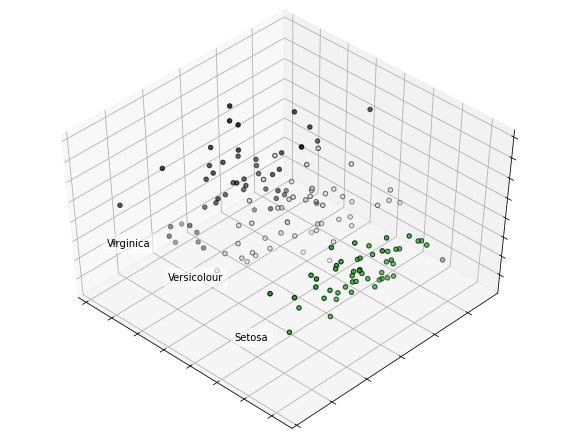

In [3]:
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

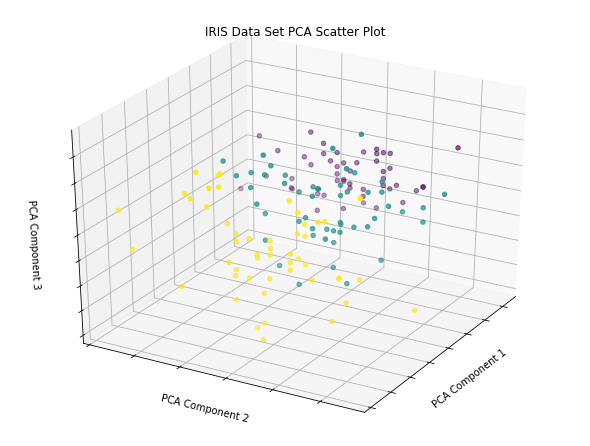

In [18]:
# Modified version of https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

iris = datasets.load_iris()

y = iris.target

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=150)

X_reduced = decomposition.PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y)

ax.set_title("IRIS Data Set PCA Scatter Plot")
ax.set_xlabel("PCA Component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PCA Component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PCA Component 3")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [36]:
# Using Plotly Express

df_x = pd.DataFrame(X_reduced, columns=["PCA 1", "PCA 2", "PCA 3"])
df_y = pd.DataFrame(y, columns=["Species ID"])

species_id_to_name = {0 : "Setosa", 1 : "Versicolor", 2 : "Virginica"}

df_y["Species"] = df_y[["Species ID"]].applymap(lambda x: species_id_to_name[x])

df = pd.concat([df_x, df_y], axis=1)

fig = px.scatter_3d(df, x="PCA 1", y="PCA 2", z="PCA 3", color="Species", size_max=10)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))